In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
%matplotlib inline
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [13]:
import warnings
warnings.filterwarnings("ignore")


In [15]:
# 1. Loading and Preprocessing
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [19]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [21]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [23]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 1


In [25]:
df=df.drop_duplicates()

In [29]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [27]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


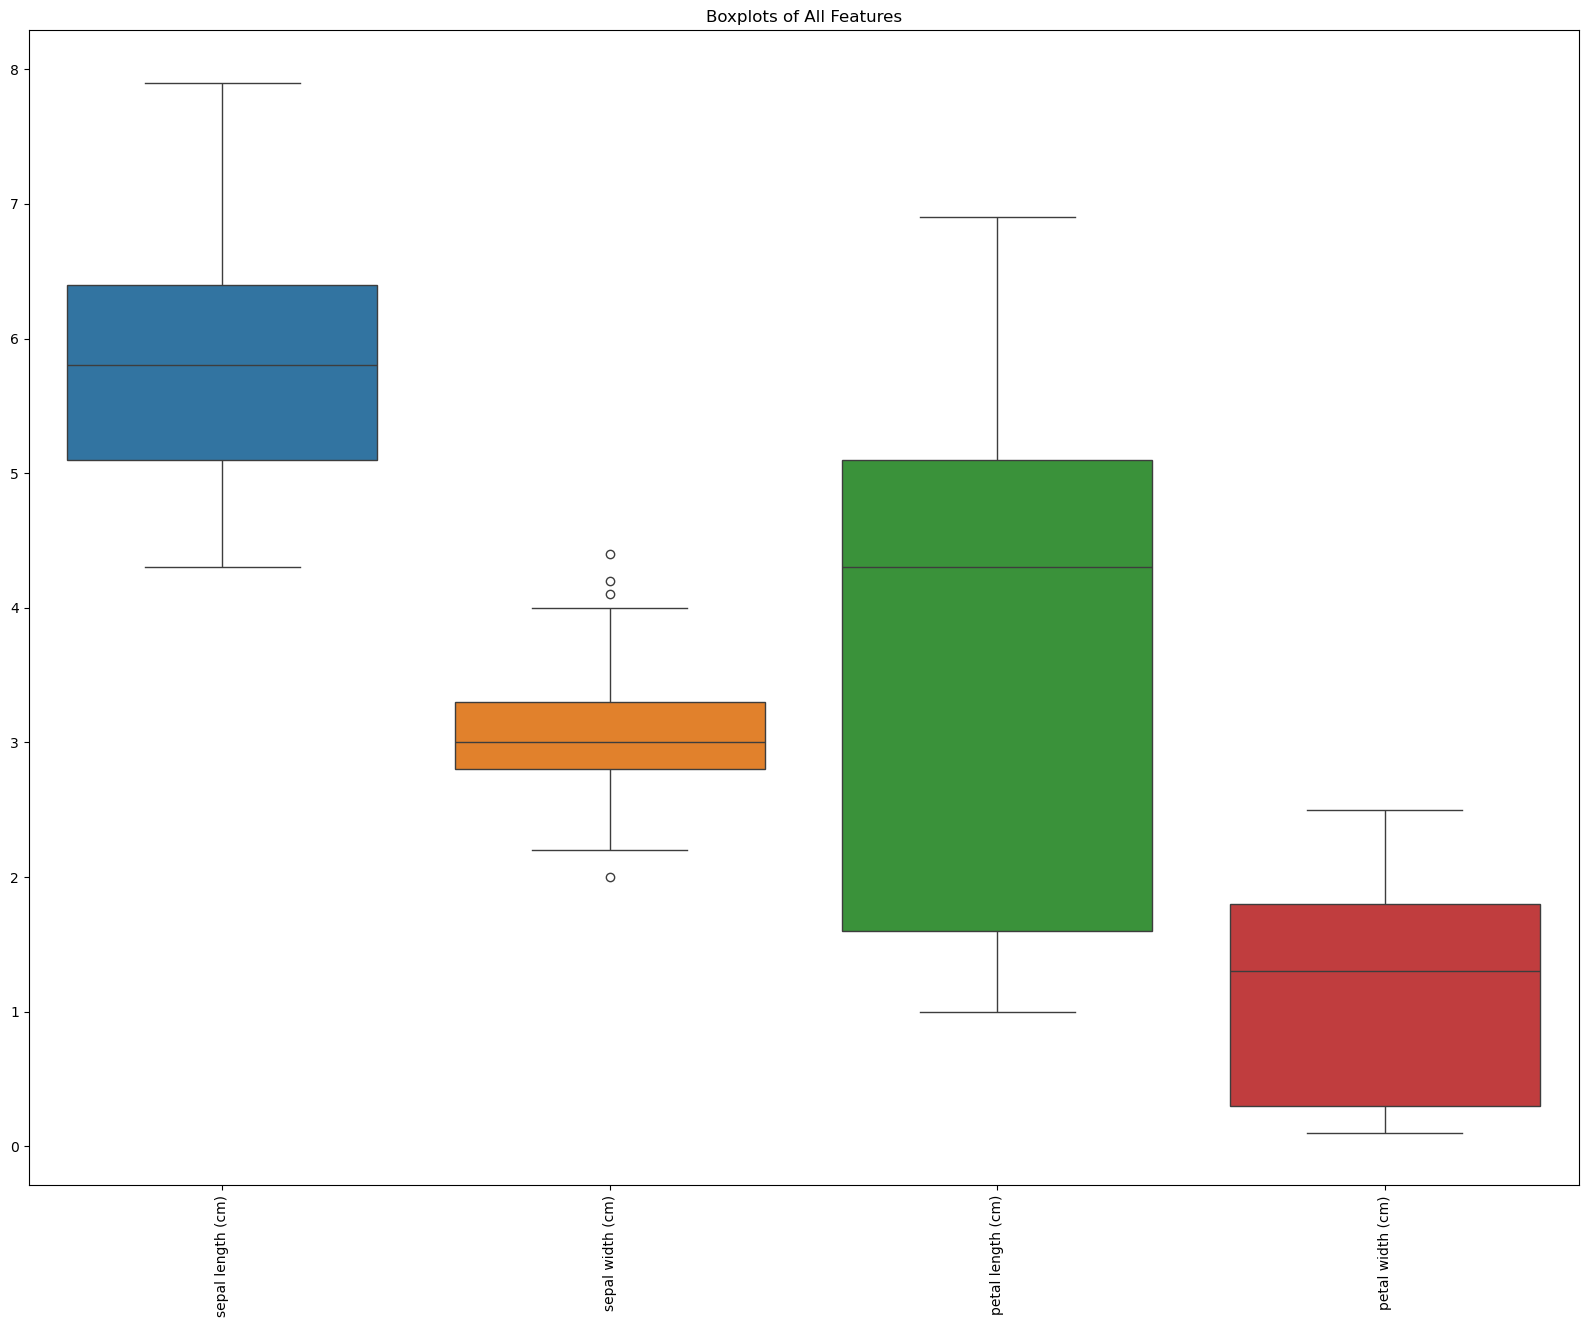

In [29]:
# Plot boxplots for all features)
plt.figure(figsize=(20,15))
sns.boxplot(data=df)
plt.title("Boxplots of All Features")
plt.xticks(rotation=90) 
plt.show()

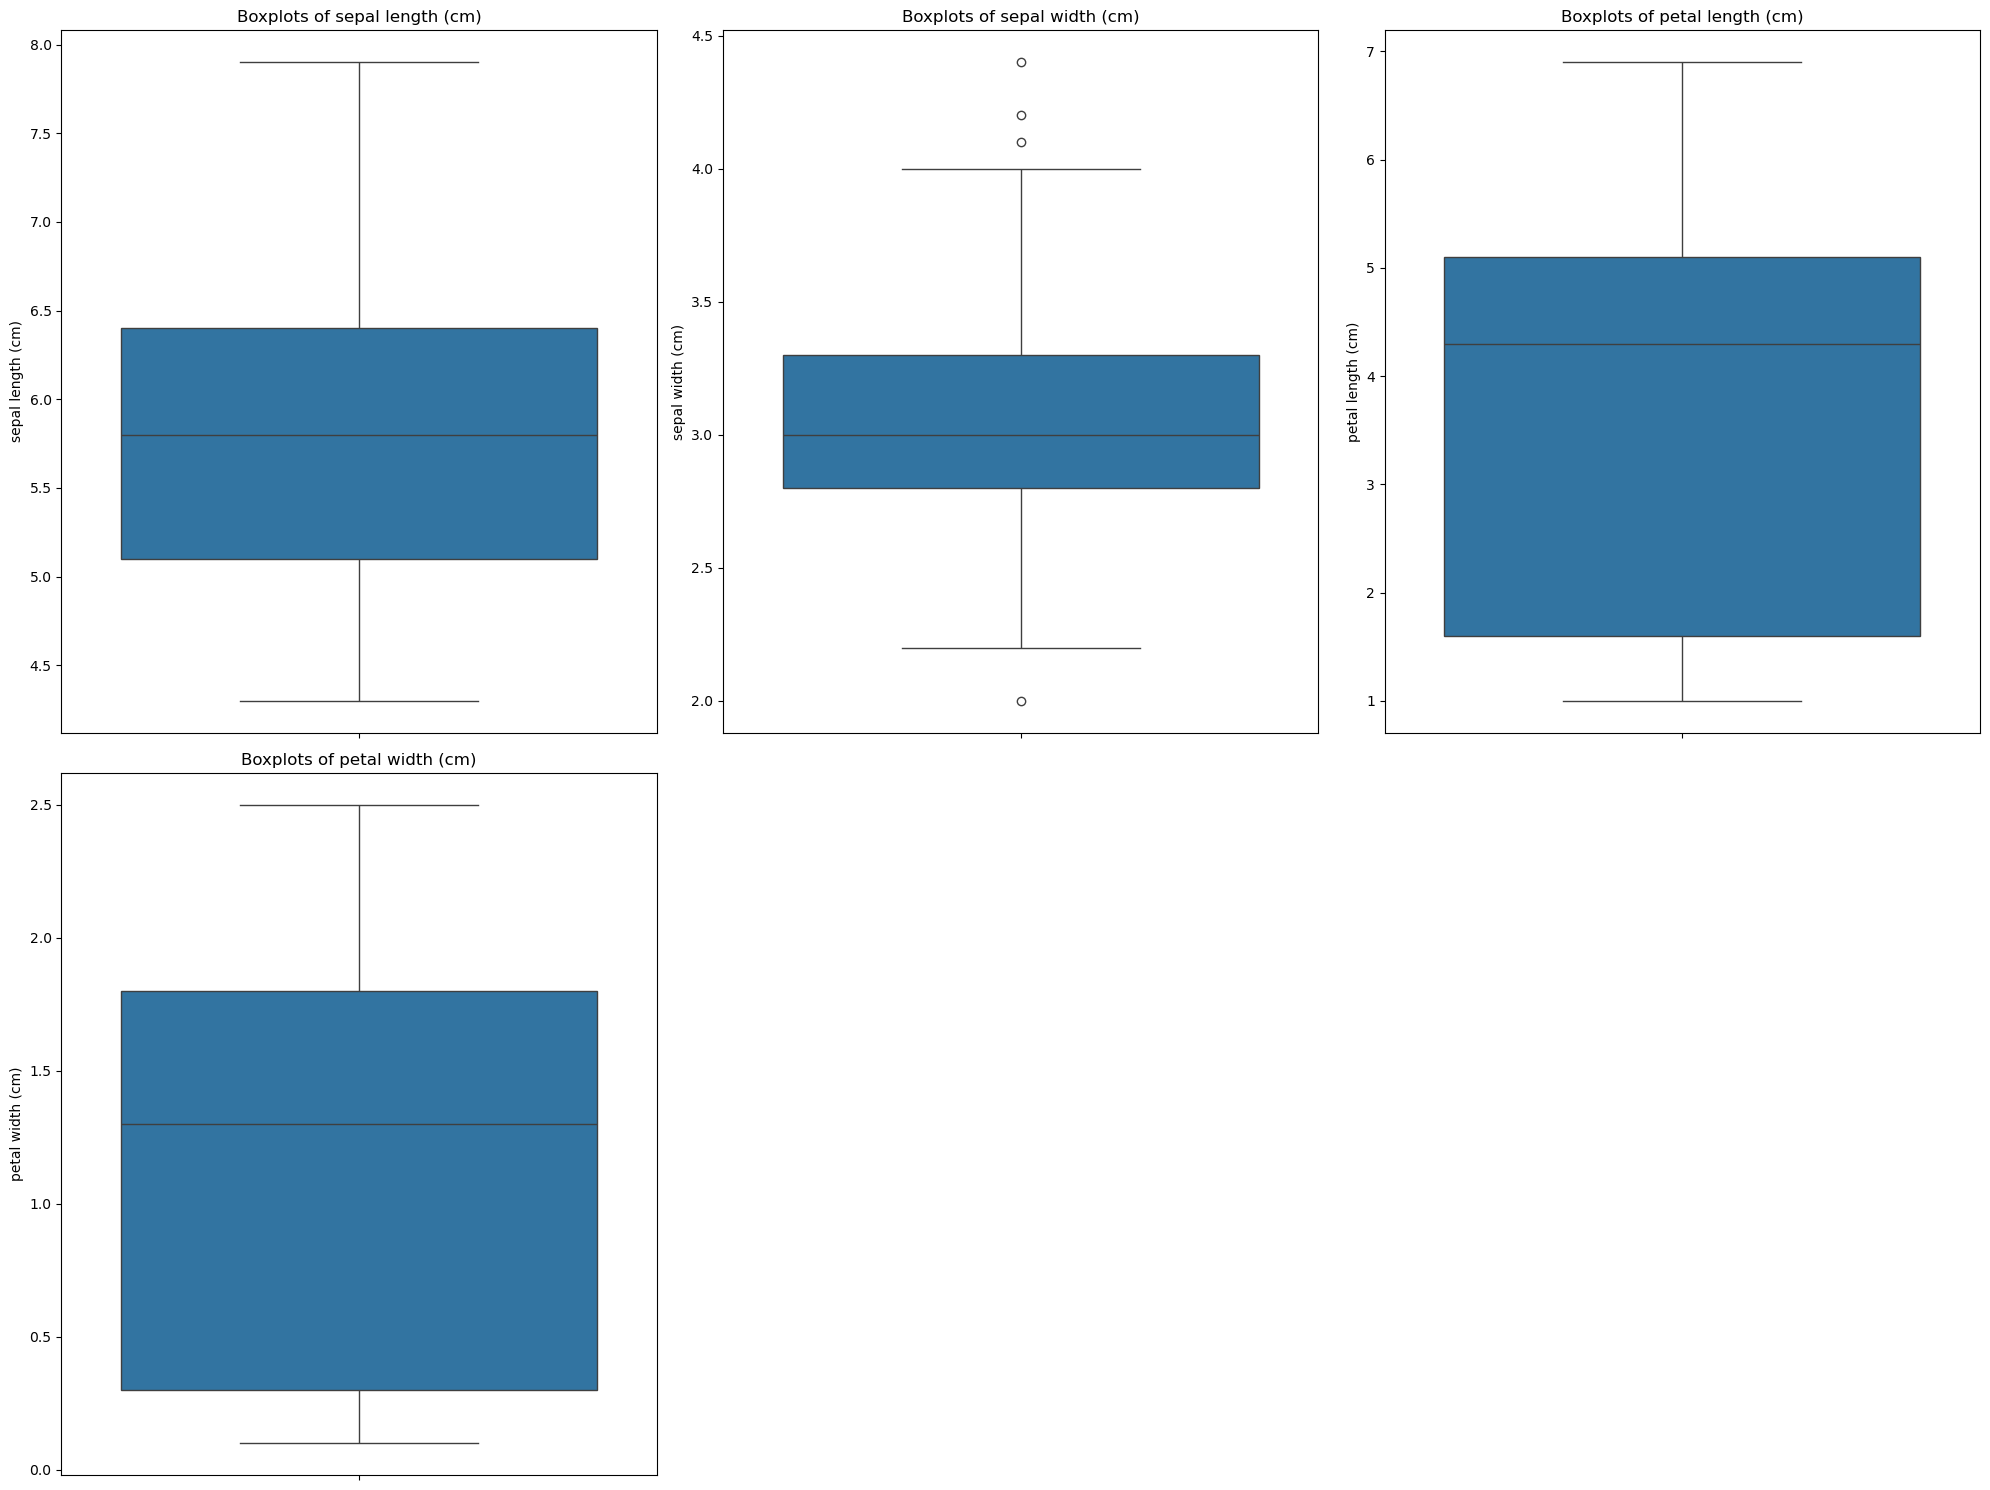

In [31]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(20,15))
for i,column in enumerate(numerical_cols,1):
    plt.subplot(len(numerical_cols)//3+1,3,i)
    sns.boxplot(data=df,y=column) 
    plt.title(f"Boxplots of {column}")  
    plt.tight_layout()

plt.show()

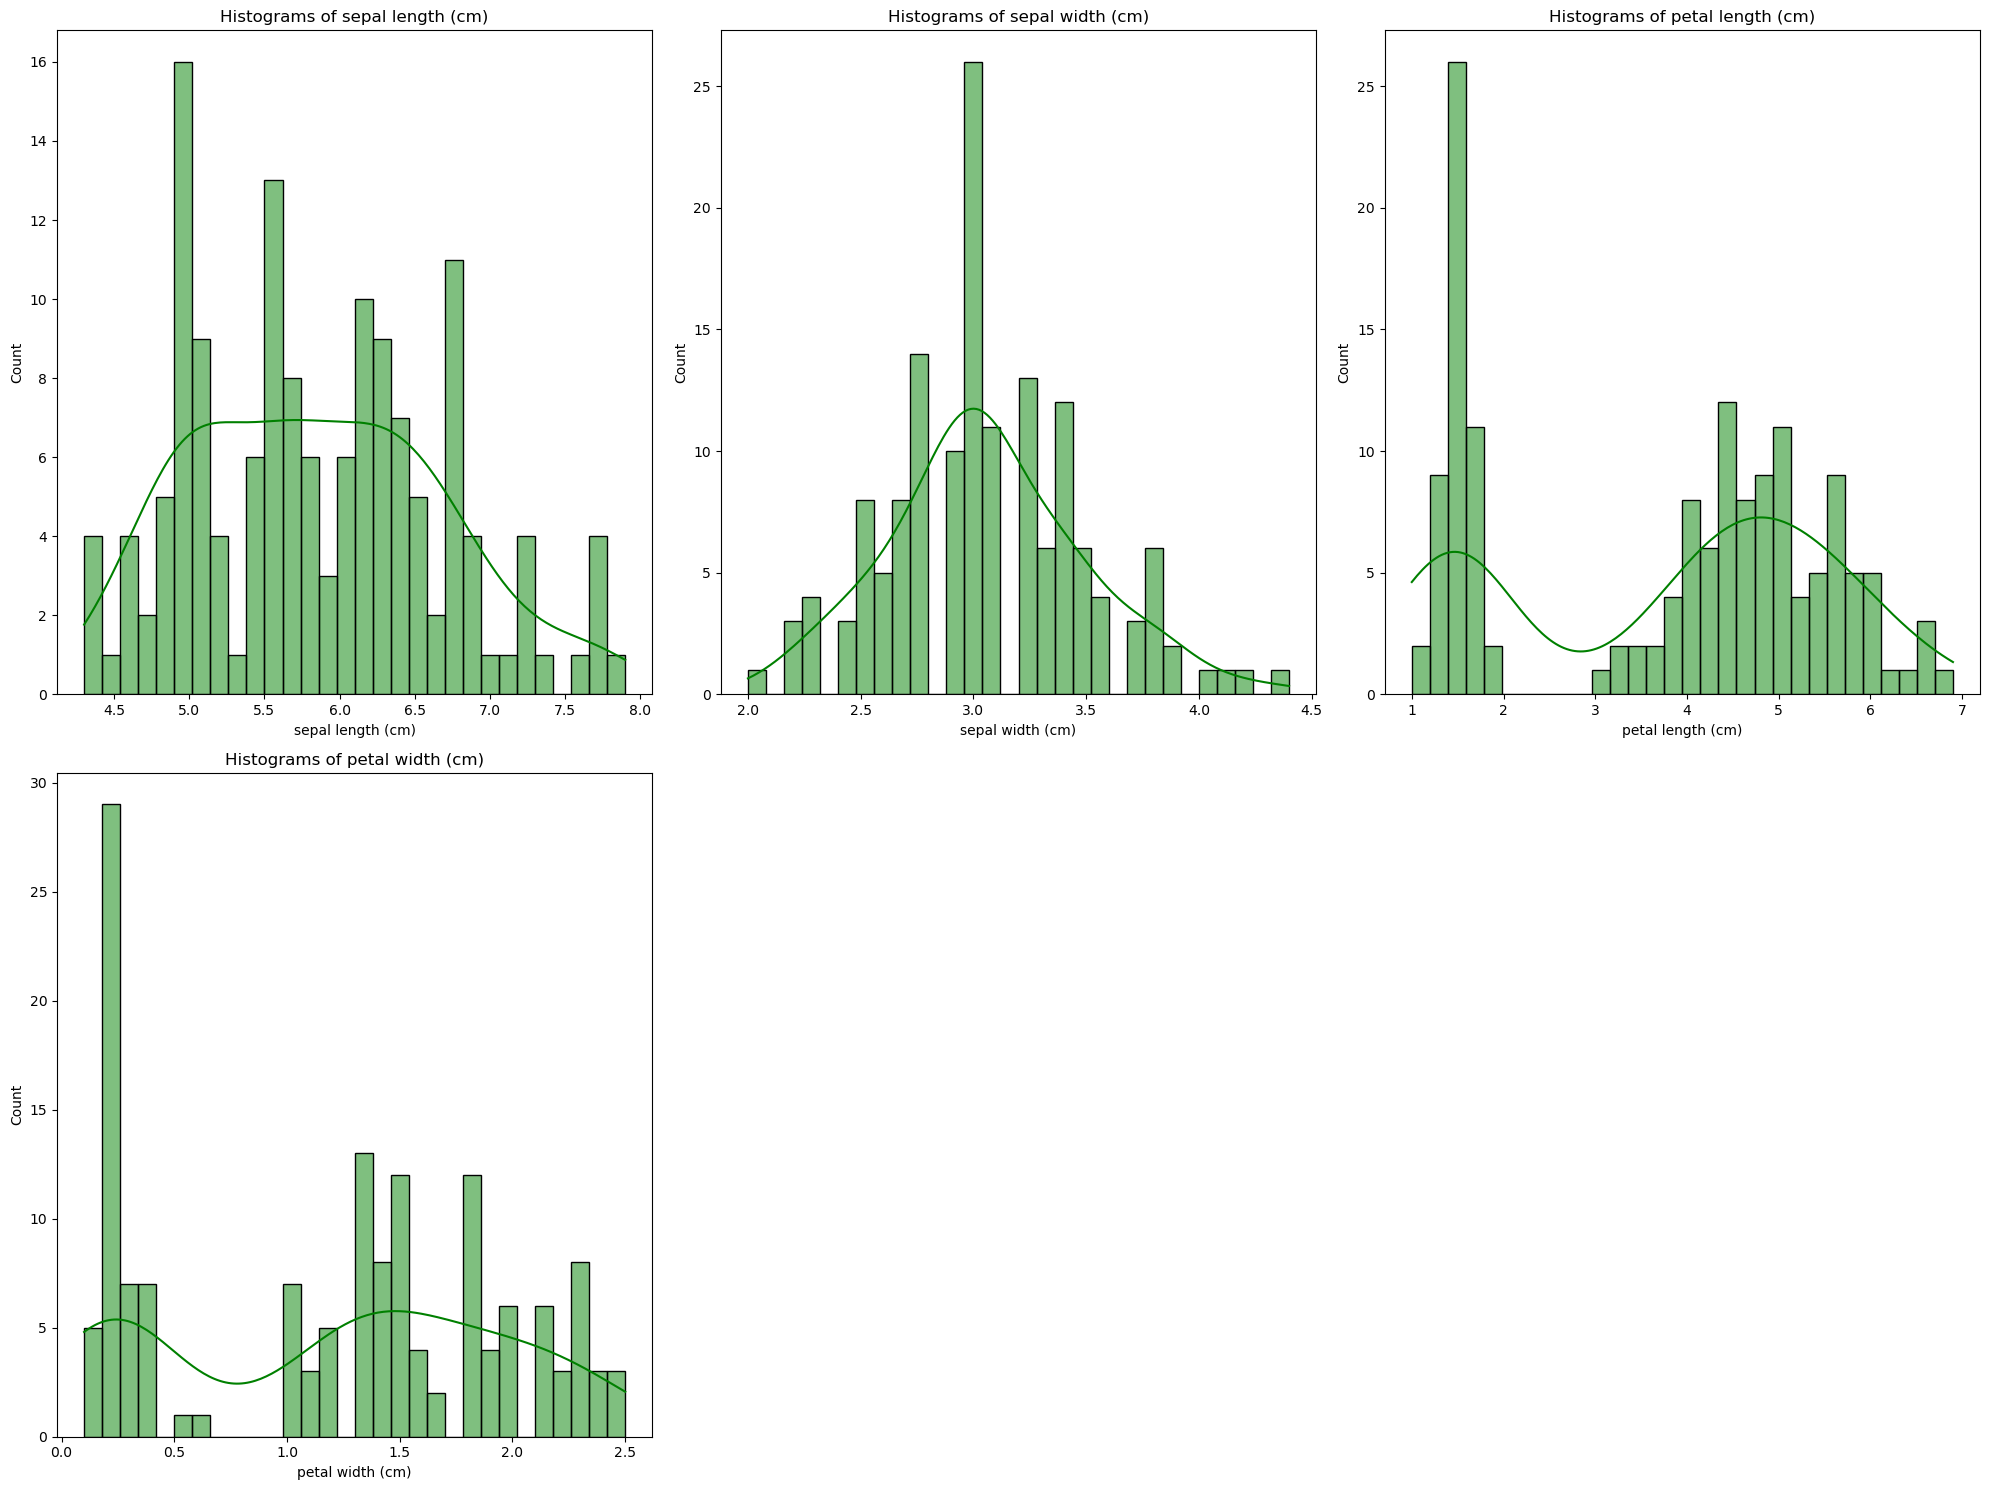

In [33]:
#Histogram
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(20,15))
for i,column in enumerate(numerical_cols,1):
    plt.subplot(len(numerical_cols)//3+1,3,i)
    sns.histplot(data=df,x=column,kde=True,color='green',bins=30) 
    plt.title(f"Histograms of {column}")  
    plt.tight_layout()

plt.show()

In [35]:
# Function to handle outliers using IQR
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
def handle_outliers_iqr(df,column):
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
        
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
            return outliers
# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
# Detect outliers for each numerical column
outliers_dict = {}
for column in numerical_columns:
    outliers = handle_outliers_iqr(df, column)
    outliers_dict[column] = len(outliers)

# Display the number of outliers for each numerical column
for column, count in outliers_dict.items():
    print(f"Column '{column}' has {count} outliers.")

Column 'sepal length (cm)' has 0 outliers.
Column 'sepal width (cm)' has 4 outliers.
Column 'petal length (cm)' has 0 outliers.
Column 'petal width (cm)' has 0 outliers.


In [37]:
#Capping Outliers
df_cleaned=df.copy()
outliercolumns=['sepal width (cm)']
for column in outliercolumns:
            Q1 = df_cleaned[column].quantile(0.25)
            Q3 = df_cleaned[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_cleaned[column]=df_cleaned[column].apply(lambda x: lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)

df_cleaned

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


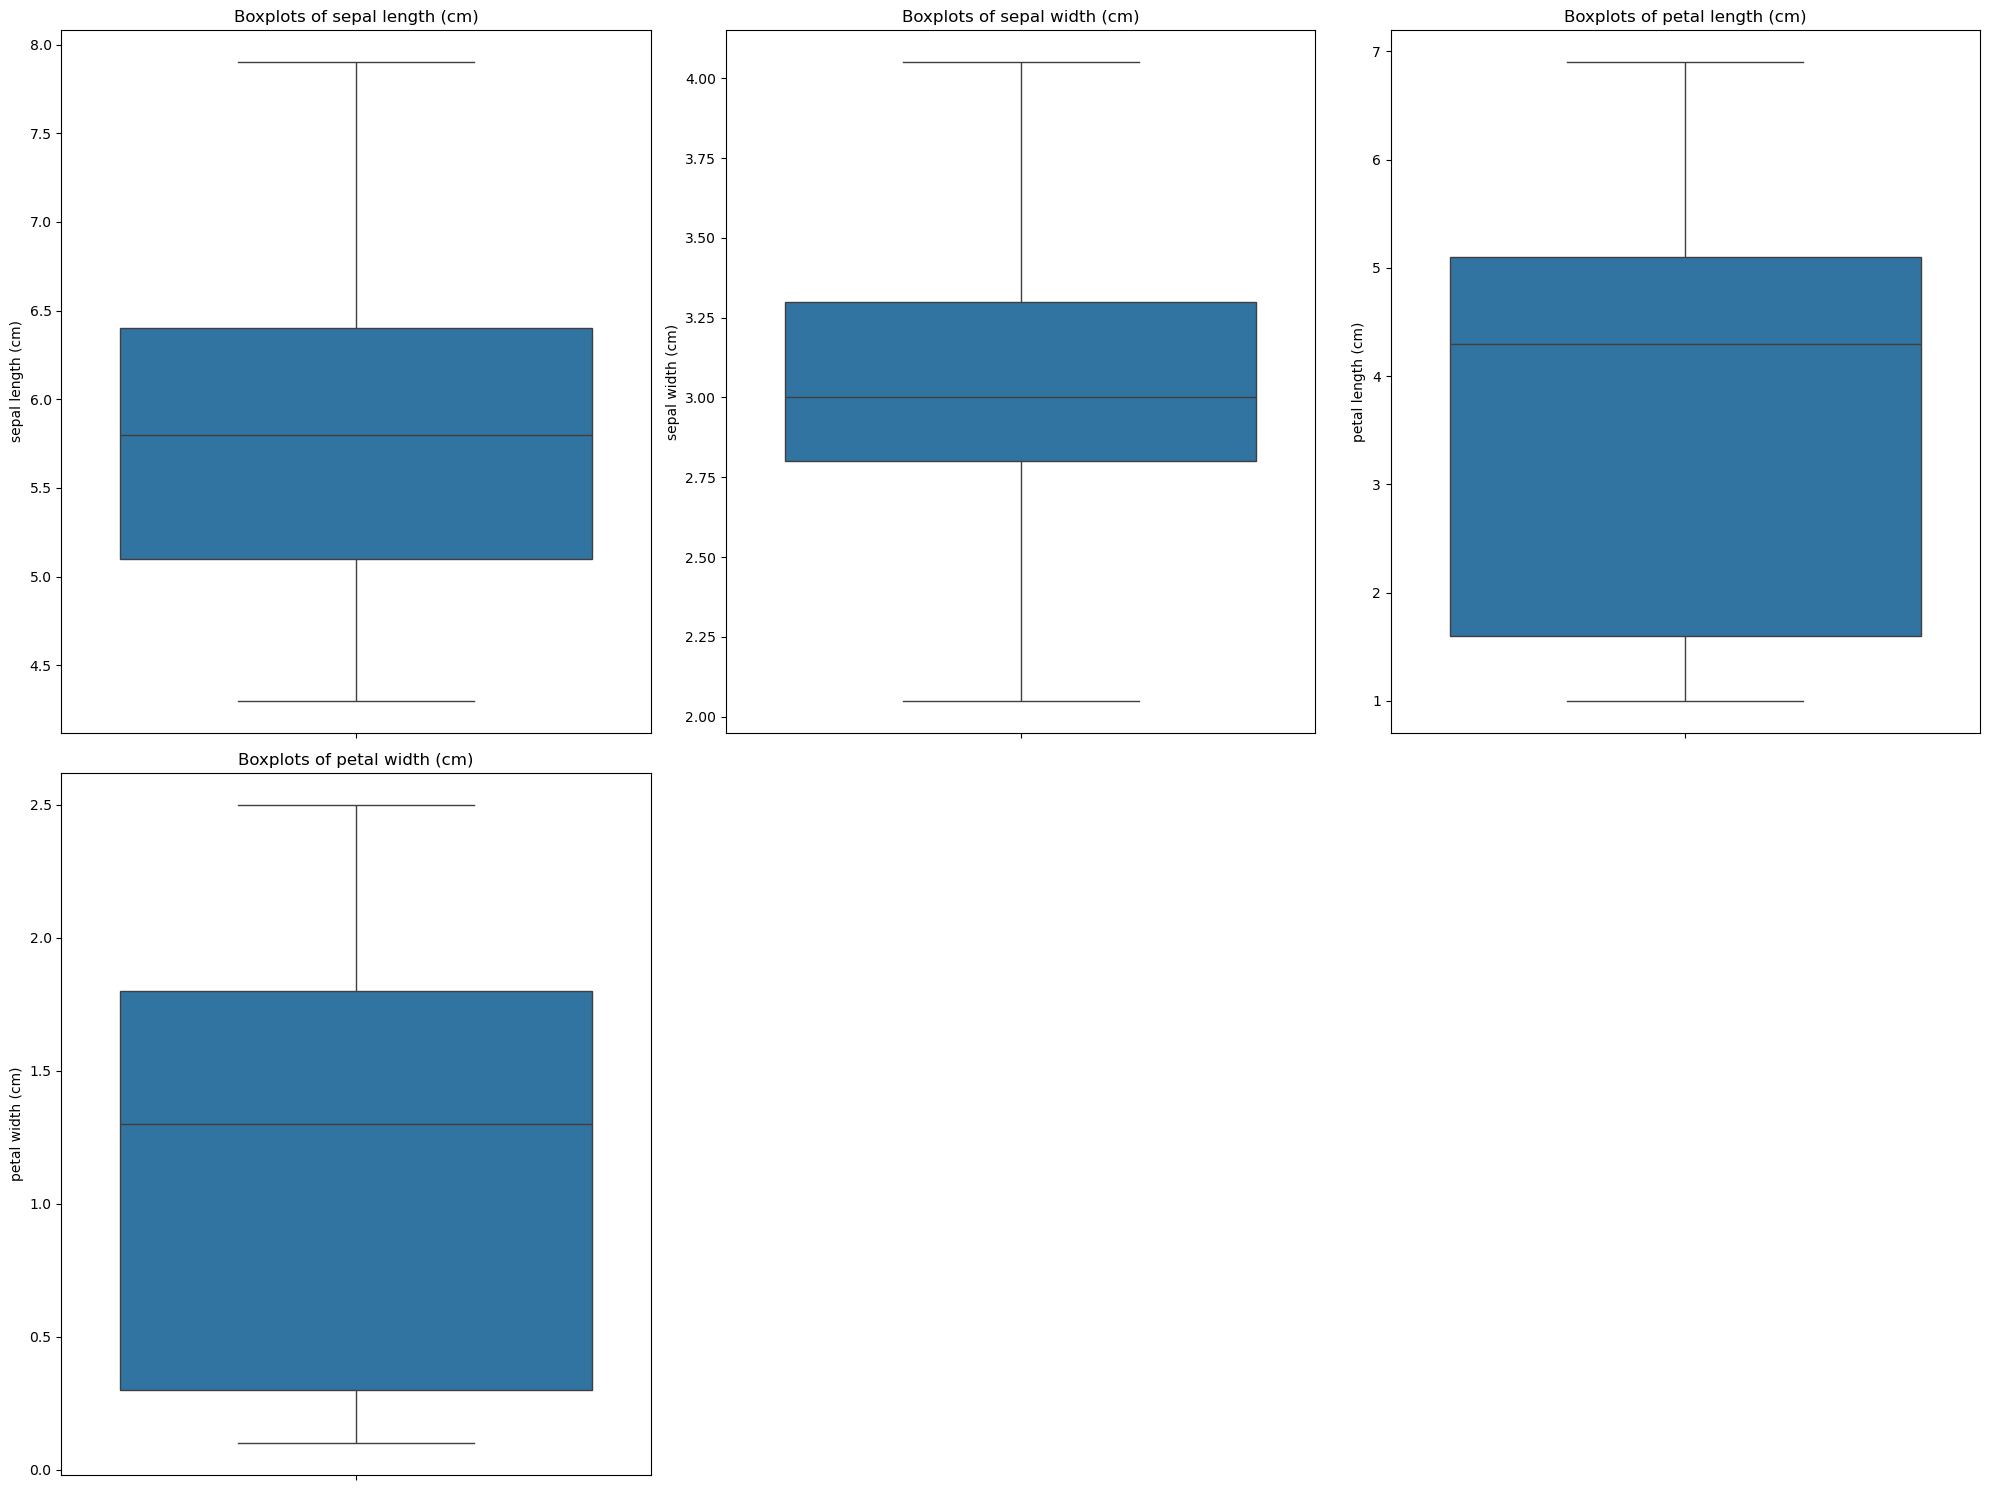

In [39]:
numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(20,15))
for i,column in enumerate(numerical_cols,1):
    plt.subplot(len(numerical_cols)//3+1,3,i)
    sns.boxplot(data=df_cleaned,y=column) 
    plt.title(f"Boxplots of {column}")  
    plt.tight_layout()

plt.show()

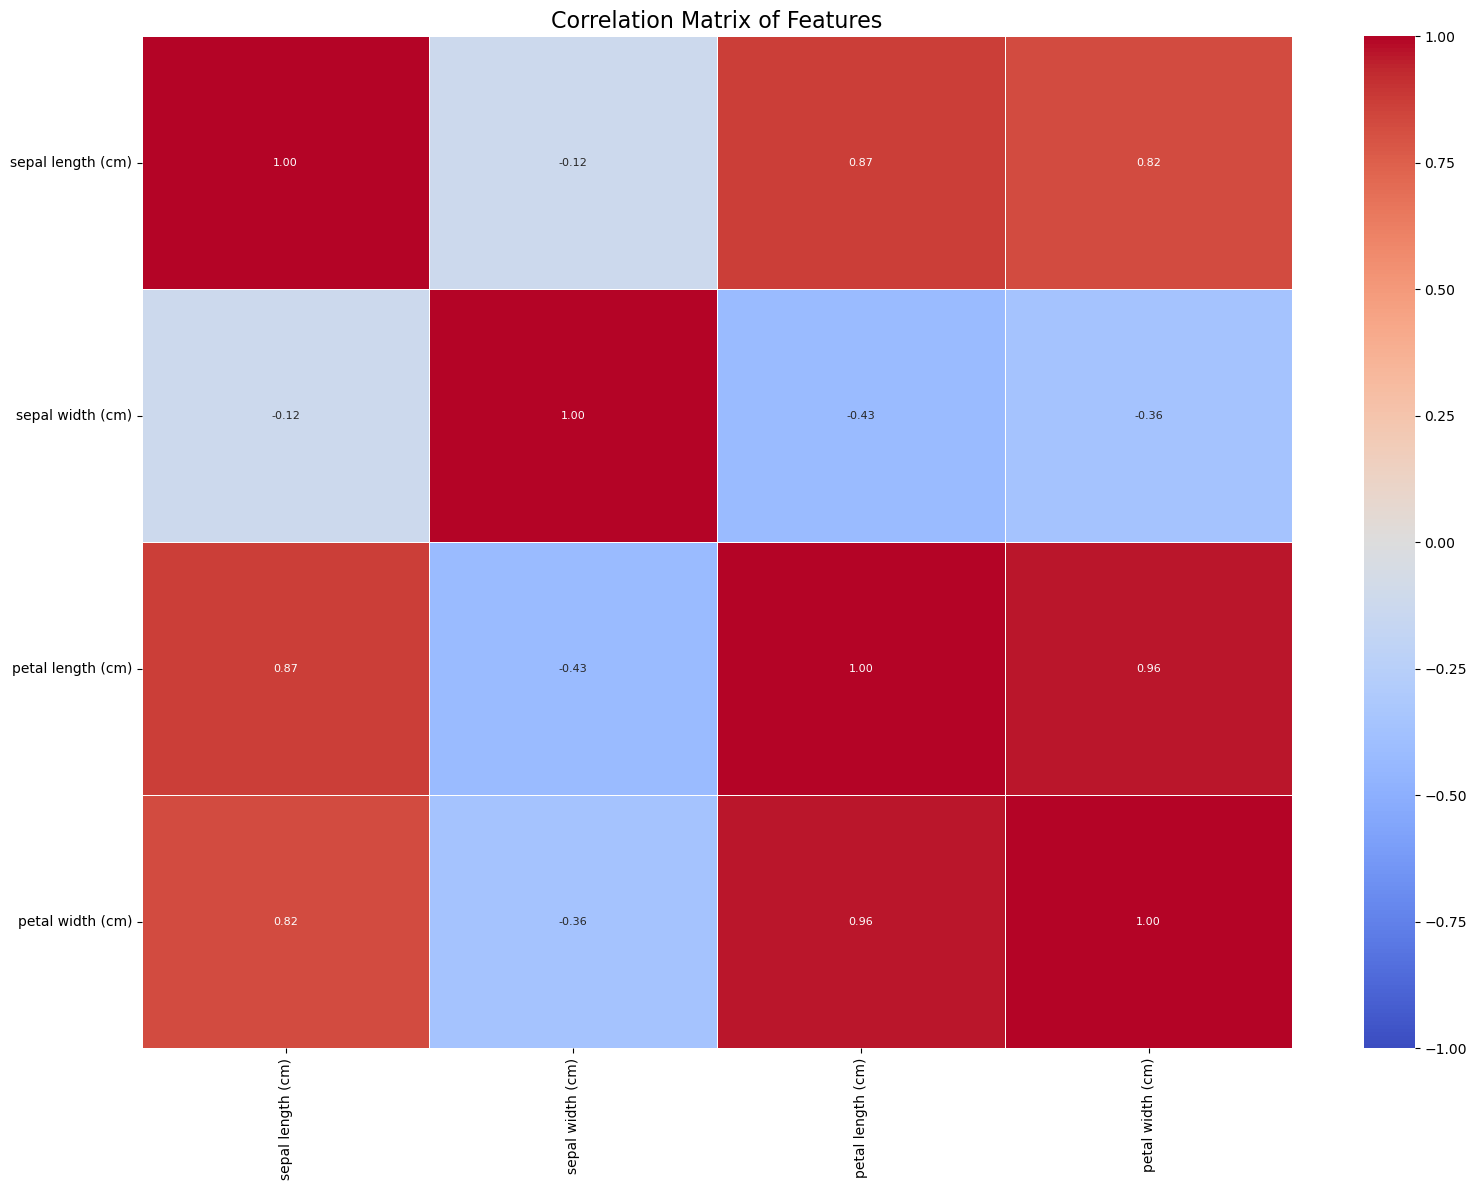

In [41]:
corr_matrix =df_cleaned.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns,
annot_kws={"size": 8},
vmin=-1, vmax=1)

plt.title("Correlation Matrix of Features", fontsize=16)
plt.xticks(rotation=90) # Rotate x-axis labels
plt.yticks(rotation=0) # Rotate y-axis labels
plt.tight_layout() # Ensure everything fits in the figure
# Show the plot
plt.show()

In [49]:
# KMeans Clustering

# KMeans clustering divides data into k clusters by minimizing the variance within each cluster.
# It iteratively assigns points to the nearest cluster center and updates the centers until convergence.
# KMeans is suitable for the Iris dataset because it assumes spherical clusters, which aligns with the nature of the dataset.

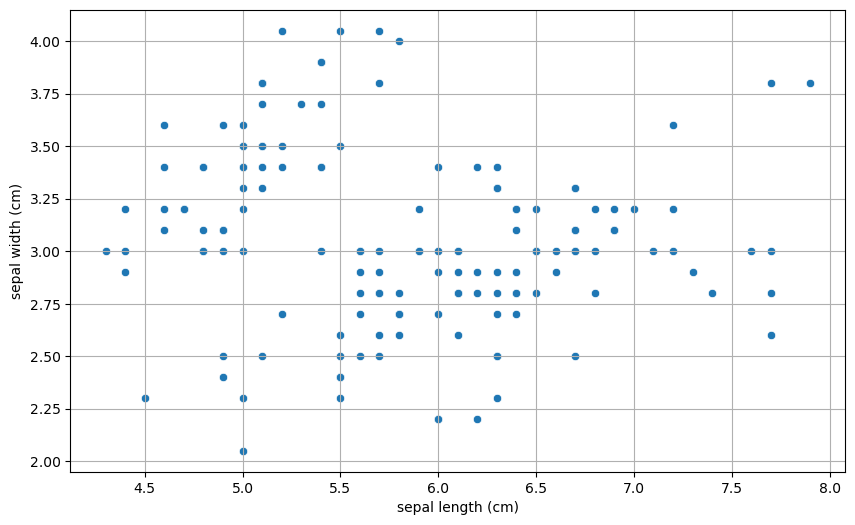

In [43]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_cleaned,x='sepal length (cm)',y='sepal width (cm)')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.grid(True)
plt.show()

In [45]:
#Elbow Method
sse=[]
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df_cleaned[['sepal length (cm)','sepal width (cm)']])
    sse.append(km.inertia_)

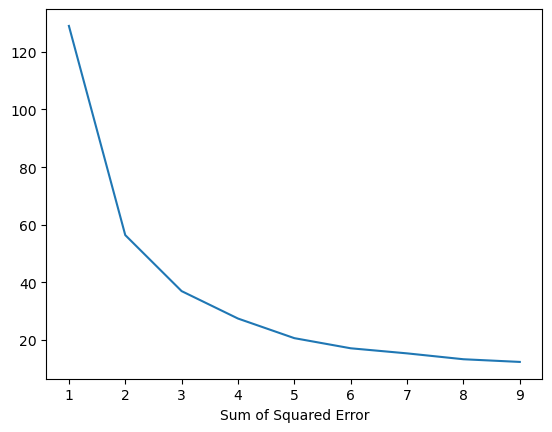

In [46]:
plt.xlabel('k')
plt.xlabel('Sum of Squared Error')
plt.plot(k_rng,sse)

In [49]:
sse

[129.00288590604032,
 56.41360939206407,
 36.97147049273104,
 27.452207740226847,
 20.64711317204301,
 17.130413587848935,
 15.366310876623377,
 13.32806150793651,
 12.398781038569277]

In [51]:
k_rng


range(1, 10)

In [53]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df_cleaned[['sepal length (cm)','sepal width (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 1, 0, 1, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 0, 1, 0, 0, 0,
       0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2])

In [55]:
df_cleaned['cluster']=y_predicted
df_cleaned

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [57]:
km.cluster_centers_

array([[7.03225806, 3.08709677],
       [5.01403509, 3.30350877],
       [6.0147541 , 2.80983607]])

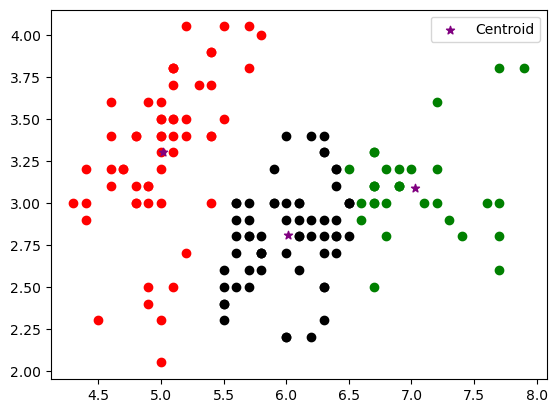

In [59]:
df1=df_cleaned[df_cleaned.cluster==0]
df2=df_cleaned[df_cleaned.cluster==1]
df3=df_cleaned[df_cleaned.cluster==2]
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='green')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='red')
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='Centroid')
plt.legend()

In [61]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [63]:
silhouette_avg=silhouette_score(df_cleaned[['sepal length (cm)','sepal width (cm)']],y_predicted)
silhouette_avg

0.42822439793134787